Importing the Libraries

In [1]:

import pandas as pd
import cv2

from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

Adding The DataSet

In [2]:
df = pd.read_csv("labels_train.csv")
df = shuffle(df)
df.head()

,frame,xmin,xmax,ymin,ymax,class_id
30224,1478733012574771129.jpg,329,375,143,183,1
9434,1478020928712636178.jpg,257,277,143,156,1
88007,1479502155721659375.jpg,1,28,143,158,1
48250,1478897786443420934.jpg,115,162,152,178,1
23846,1478732502747595880.jpg,69,97,147,171,1


Labeling The Objects

In [3]:
classes = df.class_id.unique()
print(classes)

[1 3 2 5 4]


In [4]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

Labeling the objects in the image

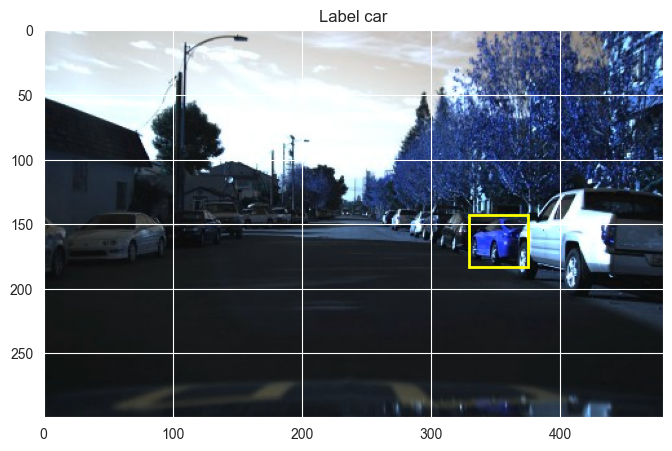

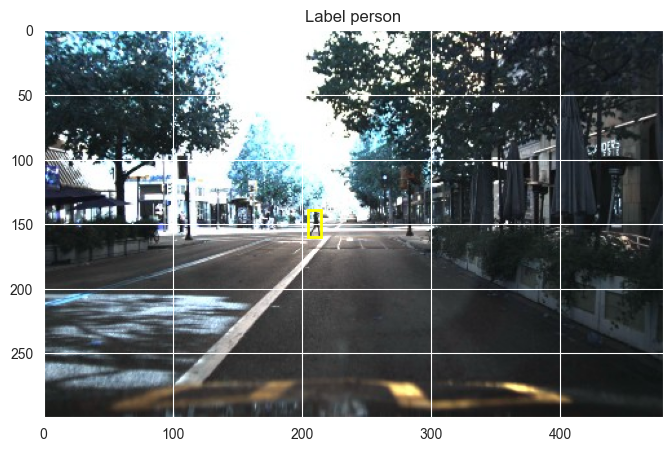

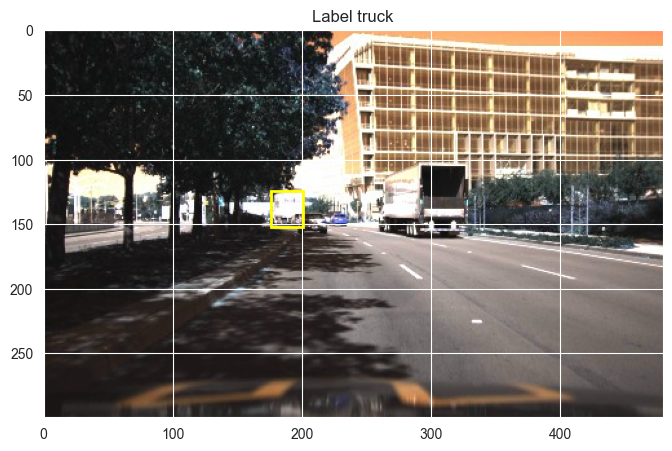

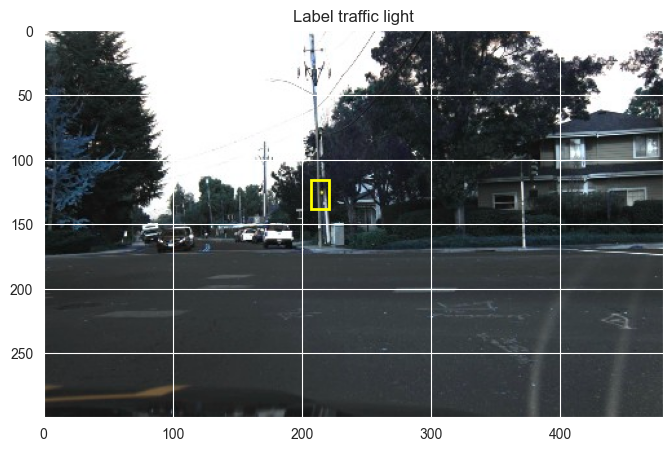

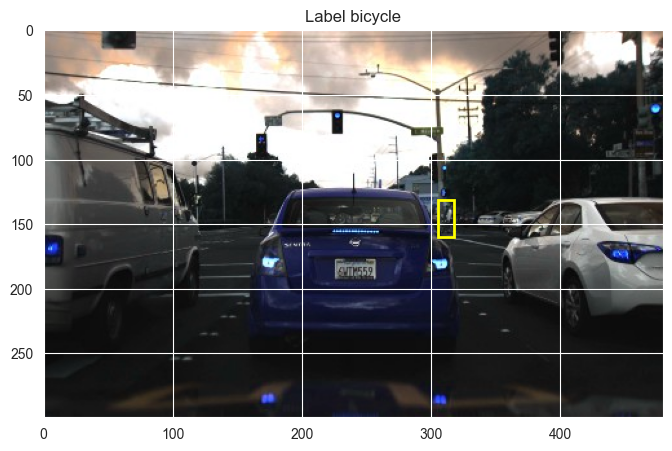

In [5]:
import os

boxes = {}
images = {}

base_path = 'images'

for class_id in classes:
    first_row = df[df['class_id'] == class_id].iloc[0]
    image_path = os.path.join(base_path, first_row['frame'])
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image not loaded: {image_path}")
        continue

    images[class_id] = image
    boxes[class_id] = [first_row['xmin'],first_row['xmax'],first_row['ymin'],first_row['ymax']]

for i in classes:
    if i in images:
        xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

        plt.figure(figsize=(8, 10))
        plt.title("Label " + labels[i])
        plt.imshow(images[i])
        plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

        plt.show()
    else:
        print(f"No image data for class: {i}")

Training the Model

In [6]:
from ultralytics import YOLO
from PIL import Image
from IPython.display import display

In [7]:
model = YOLO("yolov8m.pt")

In [8]:
results=model.predict(source="images/1478019956680248165.jpg",
                      save=True, conf=0.2,iou=0.5)


image 1/1 E:\machine learning\self driving car\images\1478019956680248165.jpg: 416x640 1 car, 1 truck, 890.2ms
Speed: 22.1ms preprocess, 890.2ms inference, 3636.4ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


In [9]:
result = results[0]
box = result.boxes[0]

In [10]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [11]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 2.0
Coordinates: [124.69143676757812, 142.68826293945312, 148.7809295654297, 162.10047912597656]
Probability: 0.7161703109741211


In [12]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [125, 143, 149, 162]
Probability: 0.72
---
Object type: truck
Coordinates: [141, 139, 157, 154]
Probability: 0.31
---


In [13]:
results1 = model.predict(source="images/1478020211690815798.jpg",
                         save=True, conf=0.2,iou=0.5)

Results = results1[0]


image 1/1 E:\machine learning\self driving car\images\1478020211690815798.jpg: 416x640 4 cars, 3 traffic lights, 501.7ms
Speed: 3.0ms preprocess, 501.7ms inference, 434.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs\detect\predict2


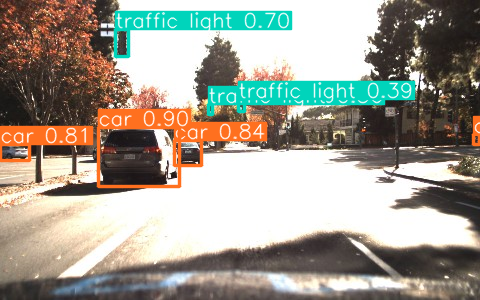

In [14]:
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

Testing the Model


image 1/1 E:\machine learning\self driving car\pig.jpg: 448x640 17 cars, 1 truck, 3 dogs, 3 sheeps, 1 cow, 638.9ms
Speed: 2.0ms preprocess, 638.9ms inference, 127.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict2
Object type: 2.0
Coordinates: [0.26051196455955505, 157.42677307128906, 126.57926177978516, 274.4104919433594]
Probability: 0.9014488458633423
Object type: car
Coordinates: [0, 157, 127, 274]
Probability: 0.9
---
Object type: car
Coordinates: [256, 163, 332, 221]
Probability: 0.89
---
Object type: car
Coordinates: [323, 152, 511, 251]
Probability: 0.87
---
Object type: car
Coordinates: [112, 158, 150, 175]
Probability: 0.83
---
Object type: car
Coordinates: [500, 155, 556, 178]
Probability: 0.81
---
Object type: car
Coordinates: [527, 153, 598, 180]
Probability: 0.75
---
Object type: dog
Coordinates: [358, 235, 459, 298]
Probability: 0.75
---
Object type: car
Coordinates: [194, 154, 264, 199]
Probability: 0.71
---
Object type: car
Coord

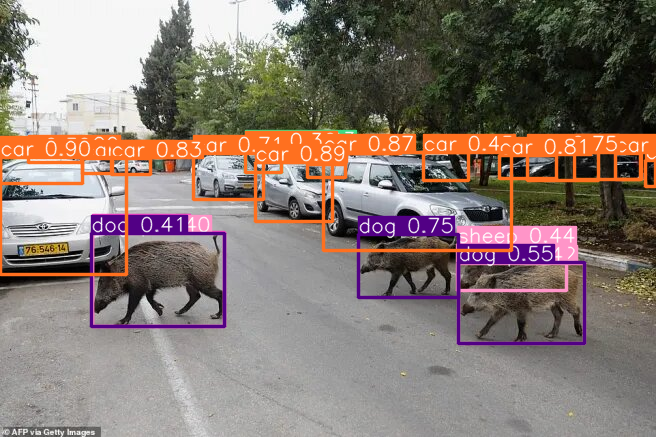

The text file is saved at: E:\machine learning\self driving car\bounding_boxes_car.txt


In [20]:
# Existing code: Use the trained model to detect vehicles
results_=model.predict(source="pig.jpg", save=True, conf=0.2,iou=0.5)

result = results_[0]
box = result.boxes[0]

# Open the file in write mode
with open('bounding_boxes_car.txt', 'w') as f:
    for result in results_:
        boxes = result.boxes
        masks = result.masks
        probs = result.probs

        cords = box.xyxy[0].tolist()
        class_id = box.cls[0].item()
        conf = box.conf[0].item()
        print("Object type:", class_id)
        print("Coordinates:", cords)
        print("Probability:", conf)
        f.write(f"Object type: {class_id}\n")
        f.write(f"Coordinates: {cords}\n")
        f.write(f"Probability: {conf}\n")

        for box in result.boxes:
            class_id = result.names[box.cls[0].item()]
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            conf = round(box.conf[0].item(), 2)
            print("Object type:", class_id)
            print("Coordinates:", cords)
            print("Probability:", conf)
            print("---")
            f.write(f"Object type: {class_id}\n")
            f.write(f"Coordinates: {cords}\n")
            f.write(f"Probability: {conf}\n")
            f.write("---\n")

results__ = model.predict(source="pig.jpg", save=True, conf=0.2,iou=0.5)
Results = results__[0]

# Plotting results
plot = results__[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

import os

# Get the current working directory
cwd = os.getcwd()

# Create the absolute file path
file_path = os.path.join(cwd, 'bounding_boxes_car.txt')

print(f"The text file is saved at: {file_path}")